# Chest Xray Pneumonia

In [8]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip *.zip

In [10]:
from fastai.vision.all import *
import matplotlib as plt
import plotly.express as px

In [11]:
data_path=Path("./chest_xray")
data_path

Path('chest_xray')

In [12]:
data_loads=ImageDataLoaders.from_folder(
    data_path,
    train="train",
    valid="val",
    item_tfms=RandomResizedCrop(224,min_scale=0.5),
    batch_tfms=aug_transforms(),
    bs=32,
    val_bs=32
)
#bs:batch size : 64
#"val_bs: None"

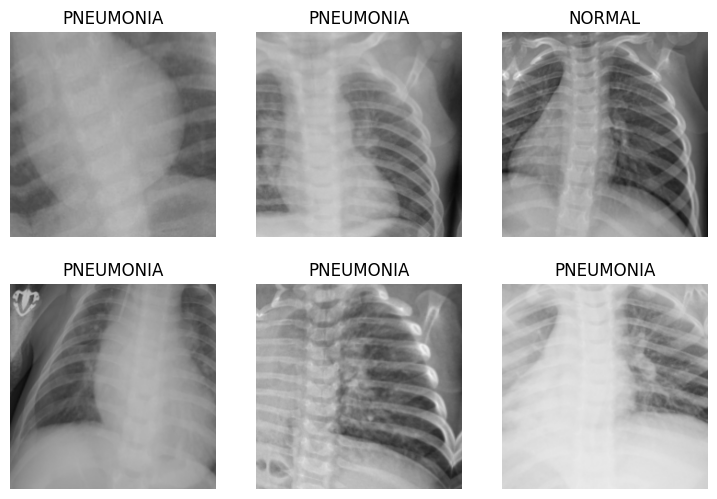

In [13]:
data_loads.train.show_batch(max_n=6)

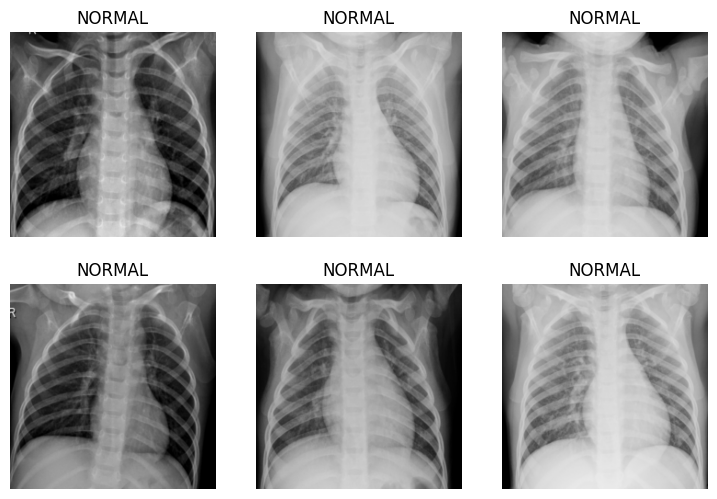

In [14]:
data_loads.valid.show_batch(max_n=6)

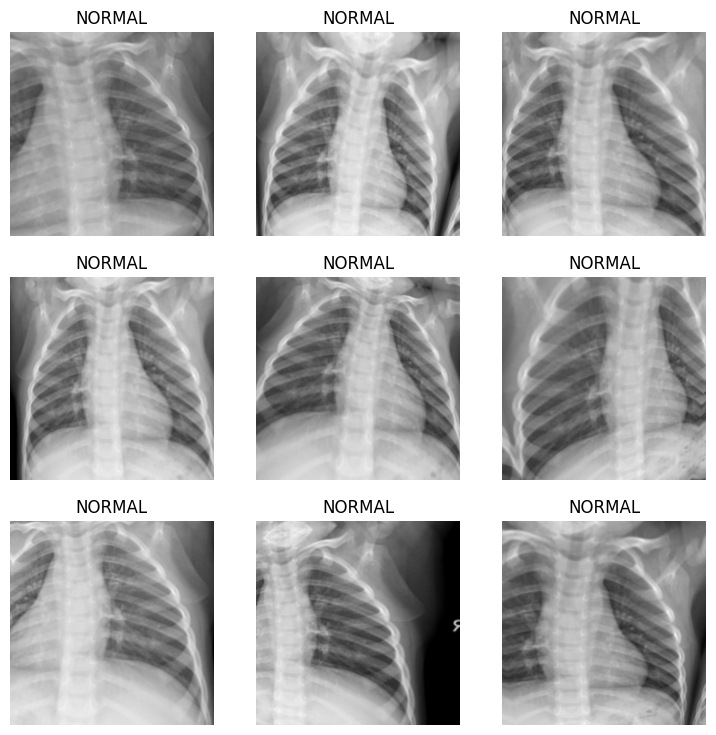

In [15]:
data_loads.train.show_batch(max_n=9,unique=True)

In [16]:
normal_train_size=len((data_path/"train"/"NORMAL").ls())
pneummnia_train_size=len((data_path/"train"/"PNEUMONIA").ls())

In [17]:
import pandas as pd
size=pd.DataFrame({"class":["Normal","PNEUMONIA"],"len":[normal_train_size,pneummnia_train_size]}).T

In [18]:
px.pie(size.T,values="len",names="class",title="Normal/PNEUMONIA Train Size")

In [19]:
train_size=len((data_path/"train"/"NORMAL").ls())+len((data_path/"train"/"PNEUMONIA").ls())
test_size=len((data_path/"test"/"NORMAL").ls())+len((data_path/"test"/"PNEUMONIA").ls())
valid_size=len((data_path/"val"/"NORMAL").ls())+len((data_path/"val"/"PNEUMONIA").ls())

In [20]:
splitSize=pd.DataFrame({"x":["train","test","valid"],"size":[train_size,test_size,valid_size]})
splitSize

,x,size
0,train,5216
1,test,624
2,valid,16


In [21]:
px.histogram(splitSize,x="x",y="size",text_auto=True,title="Size Of Spliting")

In [22]:
model=cnn_learner(data_loads,resnet34,metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning:

`cnn_learner` has been renamed to `vision_learner` -- please update your code



In [23]:
model.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,0.473321,0.651735,0.312500,01:17


epoch,train_loss,valid_loss,error_rate,time
0,0.231523,0.996673,0.375000,01:21
1,0.204764,1.210475,0.375000,01:22
2,0.173711,0.354275,0.250000,01:20
3,0.144507,0.472927,0.312500,01:22
4,0.153440,0.754630,0.375000,01:19
5,0.136772,0.627093,0.312500,01:20
6,0.138300,0.787635,0.500000,01:20
7,0.122255,0.734032,0.375000,01:19
8,0.122771,0.597411,0.375000,01:20
9,0.085701,0.271803,0.250000,01:22


In [24]:
clint=ClassificationInterpretation.from_learner(model)

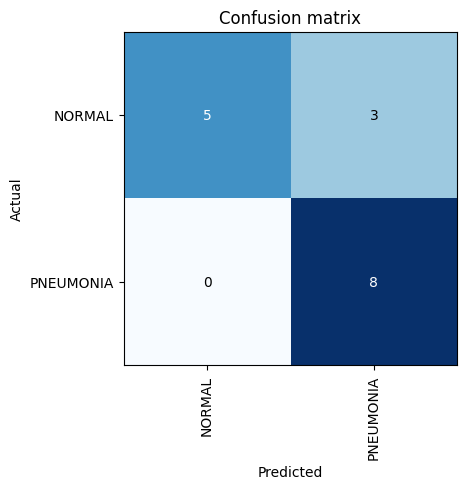

In [25]:
clint.plot_confusion_matrix()